In [2]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [4]:
diabetes = pd.read_csv('diabetesdata.csv')

In [5]:
diabetes.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,125,33.6,0.627,50,1
1,1,85.0,66.0,29,125,26.6,0.351,31,0
2,8,183.0,64.0,29,125,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0


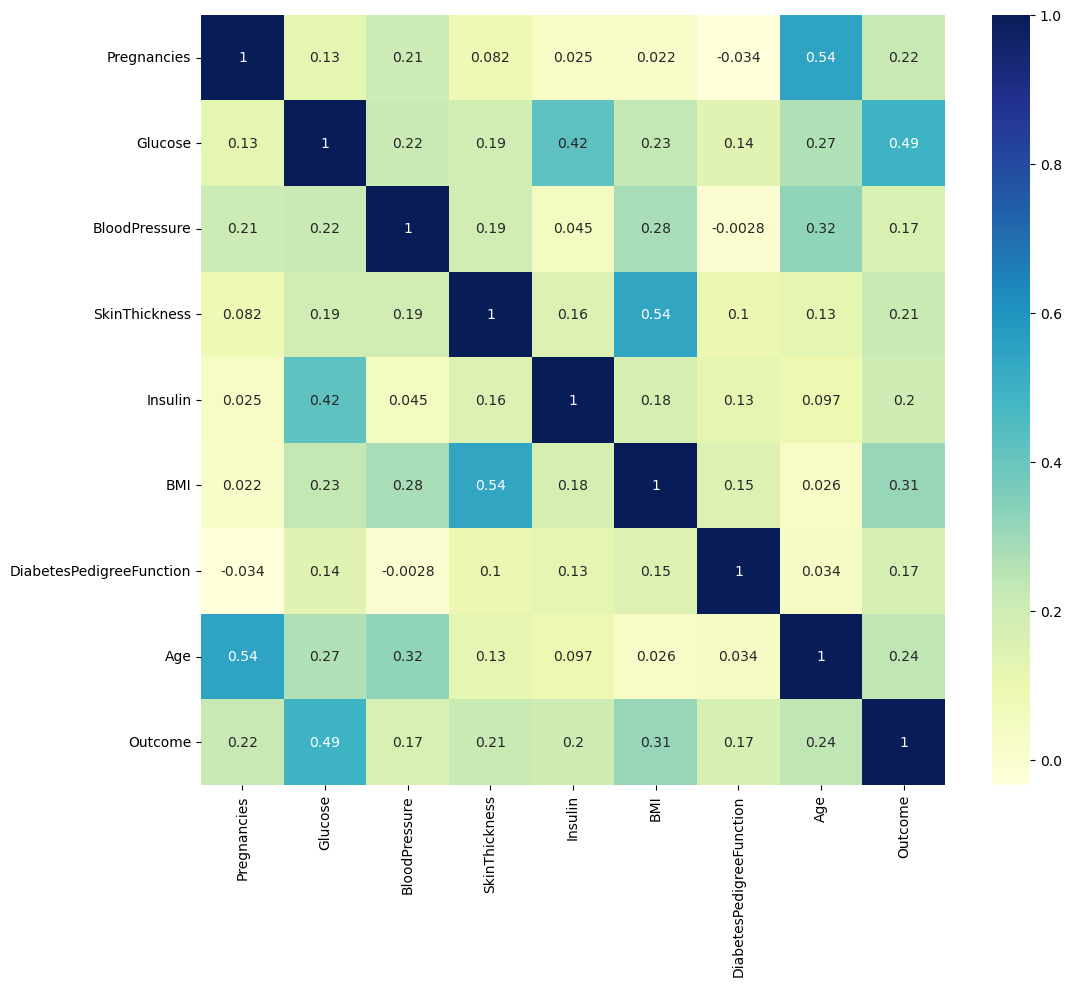

In [9]:
plt.figure(figsize=(12,10))  # Set the size of figure to 12 by 10.
p=sns.heatmap(diabetes.corr(), annot=True,cmap ='YlGnBu') 

In [12]:
high_corr_pairs = []
correlation_matrix = diabetes.corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.4:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

print("Pairs of features with correlation greater than 0.5:")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")

Pairs of features with correlation greater than 0.5:
Pregnancies and Age: 0.5443412284023392
Glucose and Insulin: 0.41906353687094605
Glucose and Outcome: 0.49292766761300233
SkinThickness and BMI: 0.5432050699718665


In [21]:
outcome_counts = diabetes['Outcome'].value_counts()
print(outcome_counts)

Outcome
0    500
1    268
Name: count, dtype: int64


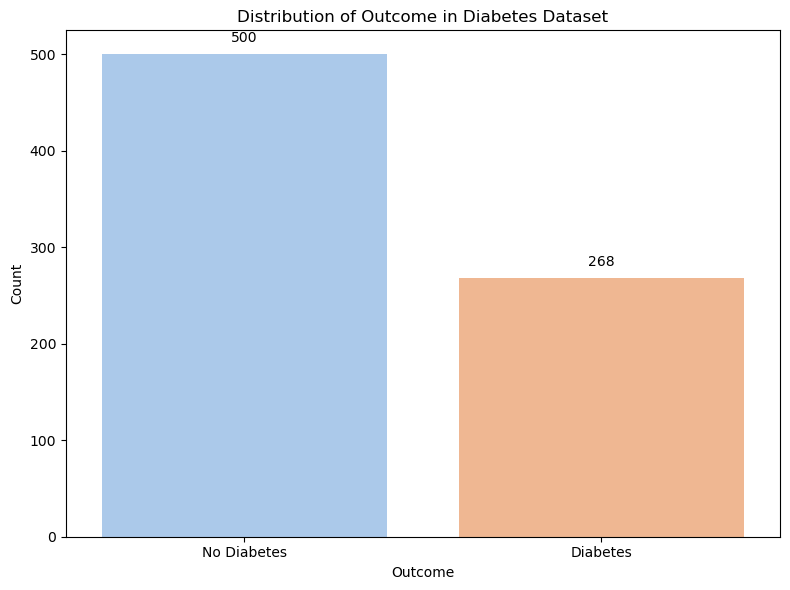

In [24]:
plt.figure(figsize=(8, 6))
sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette="pastel")

plt.title('Distribution of Outcome in Diabetes Dataset')
plt.xlabel('Outcome')
plt.ylabel('Count')

for i, count in enumerate(outcome_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.xticks([0, 1], ['No Diabetes', 'Diabetes'], rotation=0)
plt.tight_layout()
plt.show()

In [26]:
X = diabetes.iloc[:,:-1]
y = diabetes.iloc[:,-1]

In [29]:
X.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35,125,33.6,0.627,50
1,1,85.0,66.0,29,125,26.6,0.351,31
2,8,183.0,64.0,29,125,23.3,0.672,32
3,1,89.0,66.0,23,94,28.1,0.167,21


In [30]:
y.head(4)

0    1
1    0
2    1
3    0
Name: Outcome, dtype: int64

In [31]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [33]:
X_scaled

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.0158134 , -0.69530596, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.29912651,
        -0.47378505, -0.87137393]])

In [38]:
k_values = range(1, 15)
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=10)
    cv_scores.append(np.mean(scores))

In [39]:
cv_scores

[0.6757347915242652,
 0.710868079289132,
 0.7356630211893369,
 0.7330143540669858,
 0.7460013670539987,
 0.7408236500341764,
 0.7473855092276145,
 0.7421223513328777,
 0.7474025974025974,
 0.7487012987012986,
 0.759125085440875,
 0.7617224880382776,
 0.7617395762132605,
 0.7565618591934381]

In [40]:
best_k = k_values[np.argmax(cv_scores)]
print("Best k:", best_k)

Best k: 13


In [42]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,stratify=y) 

In [43]:
knn = KNeighborsClassifier(n_neighbors=13)

In [44]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [45]:
knn.score(X_test,y_test)

0.7604166666666666

In [46]:
y_pred = knn.predict(X_test)

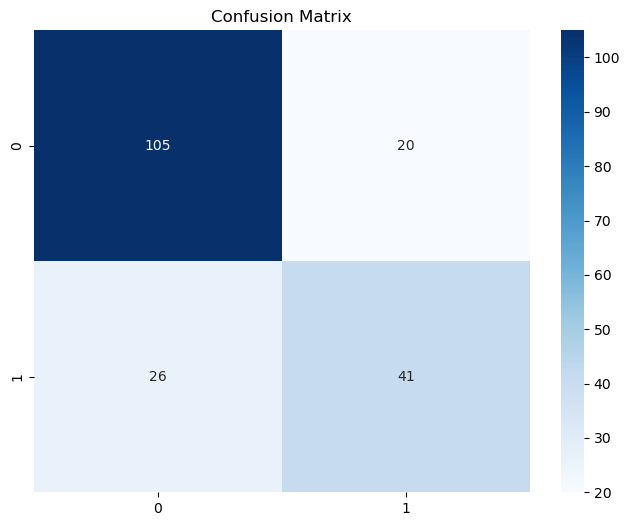

In [56]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
#plt.xlabel("Predicted")
#plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [55]:
conf_matrix

array([[105,  20],
       [ 26,  41]], dtype=int64)

In [53]:
# Generate classification report
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       125
           1       0.67      0.61      0.64        67

    accuracy                           0.76       192
   macro avg       0.74      0.73      0.73       192
weighted avg       0.76      0.76      0.76       192



In [54]:
X_test.shape

(192, 8)